In [55]:
import pandas as pd
from sklearn import preprocessing

In [49]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\house\\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
dataset = df.values
dataset

array([[13300000, 7420, 4, ..., 2, 'yes', 'furnished'],
       [12250000, 8960, 4, ..., 3, 'no', 'furnished'],
       [12250000, 9960, 3, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [1750000, 3620, 2, ..., 0, 'no', 'unfurnished'],
       [1750000, 2910, 3, ..., 0, 'no', 'furnished'],
       [1750000, 3850, 3, ..., 0, 'no', 'unfurnished']], dtype=object)

In [54]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [63]:
import numpy as np
from sklearn import preprocessing

# Assuming X is a NumPy array with mixed data types, including strings
def custom_to_numeric(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        if value.lower() == 'yes':
            return 1.0
        elif value.lower() == 'no':
            return 0.0
        else:
            return np.nan

# Apply the custom function to each element in the array
X_numeric = np.vectorize(custom_to_numeric)(X)

# Create MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform the numeric data
X_scale = min_max_scaler.fit_transform(X_numeric)

X_scale


array([[1.        , 0.39656357, 0.6       , ..., 0.        , 0.        ,
               nan],
       [0.90909091, 0.5024055 , 0.6       , ..., 0.        , 0.        ,
               nan],
       [0.90909091, 0.57113402, 0.4       , ...,        nan, 0.        ,
        0.        ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [66]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [67]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(381, 10) (82, 10) (82, 10) (381,) (82,) (82,)


In [68]:
from keras.models import Sequential
from keras.layers import Dense

In [69]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [70]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/100


4/4 [==============================] - 2s 128ms/step - loss: 0.7011 - accuracy: 0.4900 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6945 - accuracy: 0.5300 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6873 - accuracy: 0.5200 - val_loss: 0.6979 - val_accuracy: 0.5500
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6827 - accuracy: 0.5700 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6790 - accuracy: 0.6200 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6764 - accuracy: 0.6300 - val_loss: 0.6869 - val_accuracy: 0.5500
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6740 - accuracy: 0.6000 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 8/100
4/4 [

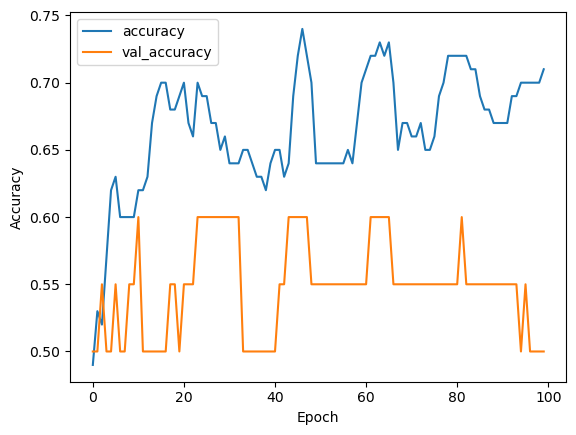

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate or load your training and validation data
# Example data (replace with your actual data)
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
Y_train = np.random.randint(2, size=(100,))  # Binary classification, adjust for your case

X_val = np.random.rand(20, 10)  # 20 samples for validation
Y_val = np.random.randint(2, size=(20,))

# Ensure consistent data types
X_train = np.array(X_train, dtype=np.float32)
Y_train = np.array(Y_train, dtype=np.int32)
X_val = np.array(X_val, dtype=np.float32)
Y_val = np.array(Y_val, dtype=np.int32)

# Define your neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, Y_val))

# Evaluate the model on test data if available
# test_loss, test_accuracy = model.evaluate(X_test, Y_test)
# print(f'Test Accuracy: {test_accuracy}')

# Predict on new data if needed
# predictions = model.predict(new_data)

# Optionally, visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [74]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 0.7078 - accuracy: 0.4700 - val_loss: 0.6857 - val_accuracy: 0.6000
Epoch 2/100
4/4 [==============================] - 0s 45ms/step - loss: 0.7054 - accuracy: 0.3700 - val_loss: 0.6976 - val_accuracy: 0.4500
Epoch 3/100
4/4 [==============================] - 0s 44ms/step - loss: 0.6783 - accuracy: 0.6100 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 42ms/step - loss: 0.6515 - accuracy: 0.6100 - val_loss: 0.7080 - val_accuracy: 0.5500
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.6224 - accuracy: 0.7000 - val_loss: 0.7827 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6148 - accuracy: 0.7500 - val_loss: 0.9168 - val_accuracy: 0.5500
Epoch 7/100
4/4 [==============================] - 0s 36ms/step - loss: 0.6399 - accuracy: 0.6400 - val_loss: 0.8574 - val_accuracy: 0.5500
Epoch 8/100
4/4 [===

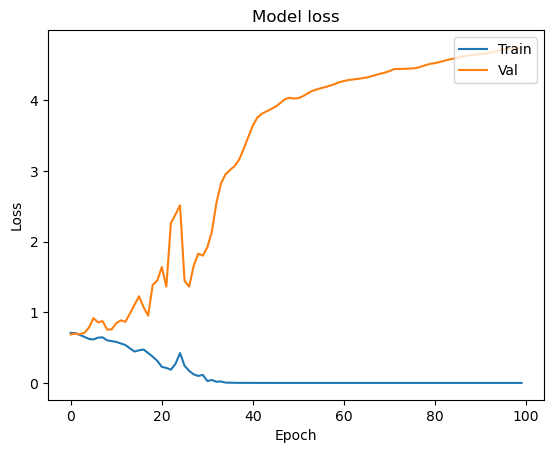

In [75]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

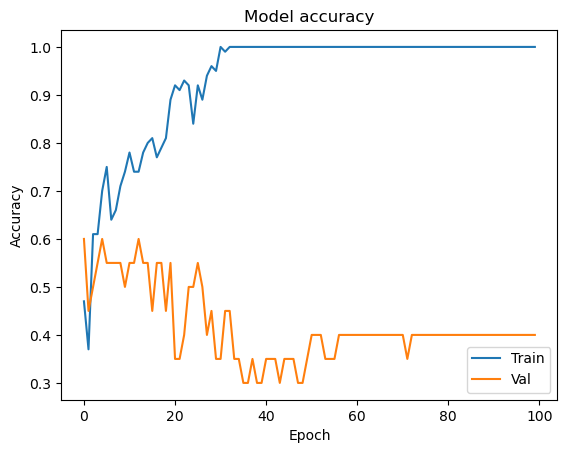

In [78]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])  # Use 'val_accuracy' instead of 'val_acc'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [79]:
from keras.layers import Dropout
from keras import regularizers

In [80]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])


In [81]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 2s 127ms/step - loss: 29.2332 - accuracy: 0.5200 - val_loss: 24.9649 - val_accuracy: 0.6000
Epoch 2/100
4/4 [==============================] - 0s 43ms/step - loss: 23.5520 - accuracy: 0.5500 - val_loss: 19.9551 - val_accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 18.7683 - accuracy: 0.5500 - val_loss: 15.7461 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 14.7593 - accuracy: 0.5500 - val_loss: 12.2719 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 45ms/step - loss: 11.4706 - accuracy: 0.5500 - val_loss: 9.4635 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 49ms/step - loss: 8.8201 - accuracy: 0.5500 - val_loss: 7.2334 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 56ms/step - loss: 6.7312 - accuracy: 0.5500 - val_loss: 5.4936 - val_accuracy: 0.6000
Epoch 8/10

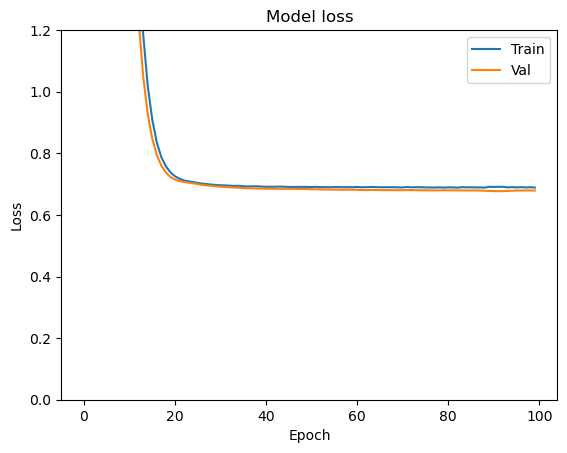

In [82]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

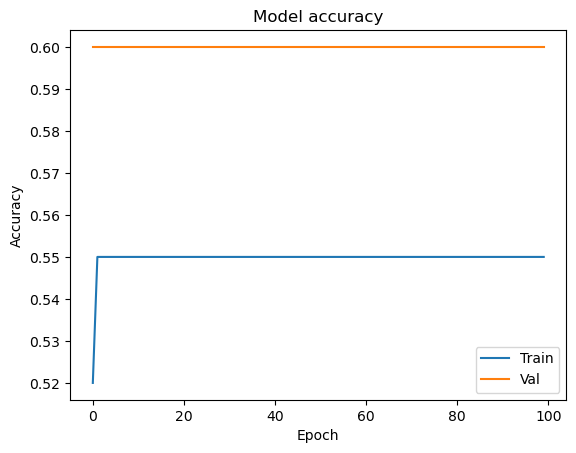

In [83]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()